# Team Project - Image Classifier Project Specifications

1. import libraries

In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

from PIL import Image
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

2. Preprocess images: Load the images from dataset and preprocess them.

- resizing the images to a consistent size
- converting them to a suitable color format (e.g., RGB)
- normalizing the pixel values.

In [51]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    image = cv2.resize(image,(64,64)) # Resize to 64*64
    image = image.astype(np.float32)  # Convert pixel values to float32
    image /= 255.0  # Normalize pixel values to the range [0, 1]
    return image


3. read image data


In [52]:
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            image = preprocess_image(image_path)
            images.append(image)
            labels.append(os.path.splitext(filename)[0].split("_")[0])
    return images, labels

train_folder = r"C:\Users\yaobi\Desktop\machine learning project\train"
train_images, train_labels = load_images_from_folder(train_folder)


test_folder = r"C:\Users\yaobi\Desktop\machine learning project\test"
test_images, test_labels = load_images_from_folder(test_folder)

train_images = np.reshape(train_images, (len(train_images), 64, 64, 3))
test_images = np.reshape(test_images, (len(test_images), 64, 64, 3))

def create_dataset(images, labels):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    return dataset



train_dataset = create_dataset(train_images, train_labels)
test_dataset = create_dataset(test_images, test_labels)

one hot coding the labels

In [53]:
print (test_images.shape)
print (test_labels)

(60, 64, 64, 3)
['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


In [54]:
def to_onehot(arr):
    onehot = []

    for label in arr:
        if label == 'apple':
            _1hot = [1, 0, 0, 0]
        elif label == 'banana':
            _1hot = [0, 1, 0, 0]
        elif label == 'orange':
            _1hot = [0, 0, 1, 0]
        else:   # label == 3
            _1hot = [0, 0, 0, 1]
        
        onehot.append(_1hot)

    # converting from python list to numpy array
    return np.array(onehot)


train_onehot_labels=to_onehot(train_labels)
test_onehot_labels=to_onehot(test_labels)

In [55]:
print (test_images[0])


[[[0.80784315 0.9019608  0.9137255 ]
  [0.32941177 0.44705883 0.3254902 ]
  [0.20392157 0.30980393 0.1254902 ]
  ...
  [0.29411766 0.3882353  0.20784314]
  [0.20392157 0.28627452 0.12941177]
  [0.60784316 0.654902   0.4       ]]

 [[0.7294118  0.80784315 0.8352941 ]
  [0.29411766 0.39607844 0.28627452]
  [0.21176471 0.3372549  0.16470589]
  ...
  [0.4745098  0.53333336 0.32941177]
  [0.30588236 0.34901962 0.14509805]
  [0.16470589 0.24705882 0.0627451 ]]

 [[0.8392157  0.92156863 0.9372549 ]
  [0.2784314  0.3764706  0.28627452]
  [0.18039216 0.3254902  0.14509805]
  ...
  [0.91764706 0.90588236 0.78039217]
  [0.8509804  0.8745098  0.69411767]
  [0.2        0.26666668 0.09411765]]

 ...

 [[0.31764707 0.3882353  0.26666668]
  [0.24313726 0.34509805 0.20392157]
  [0.19215687 0.28235295 0.17254902]
  ...
  [0.48235294 0.5058824  0.28627452]
  [0.27058825 0.3137255  0.15686275]
  [0.19607843 0.2784314  0.14509805]]

 [[0.5882353  0.6117647  0.37254903]
  [0.21176471 0.30980393 0.16862746]


In [56]:
print (test_labels[0])

print(test_labels)

apple
['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


to visualise my data

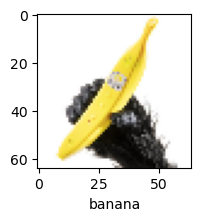

In [57]:
classes =["apple", "orange",'banana','mixed']

label_mapping = {label: index for index, label in enumerate(classes)}

def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[label_mapping[y[index]]])


plot_sample(test_images,test_labels,19)

In [58]:
print(train_labels)
print(test_labels)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'ban

4. Batch and shuffle the datasets: To train your CNN model efficiently, batch the data and shuffle the training dataset.

In [59]:
# batch_size = 30

# train_dataset = train_dataset.shuffle(len(train_images)).batch(batch_size)
# test_dataset = test_dataset.batch(batch_size)

create model

In [60]:
'''
Create our model
'''
def create_model():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.RandomFlip(mode = "horizontal_and_vertical", seed = 5))
    model.add(tf.keras.layers.RandomRotation(0.2, fill_mode= "reflect", interpolation="bilinear", seed= 5, fill_value=0.0))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(tf.keras.layers.Dropout(0.25))
    # model.add(tf.keras.layers.BatchNormalization())
    # lead to overfitt
    model.add(tf.keras.layers.Flatten())
    #model.add(tf.keras.layers.Dropout(0.25))
    #not vry usful
    model.add(tf.keras.layers.Dense(units=128, activation='relu')) 
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=64, activation='relu')) 
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #optimizer = tf.keras.optimizers.Adam(learning_rate=0.008)    
    #model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 
    return model

model = create_model()

In [61]:
print (len(train_images))
print (len(train_labels))

240
240


In [62]:
print (train_images.shape)
print (type(train_images))

(240, 64, 64, 3)
<class 'numpy.ndarray'>


In [63]:
print (train_onehot_labels.shape)
print (type(train_onehot_labels))

(240, 4)
<class 'numpy.ndarray'>


In [64]:
'''
Train our model.

def train_model(model, x_train, y_train):
    return model.fit(x=x_train, y=y_train, epochs=30)      

hist= train_model(model, train_images, train_onehot_labels)
'''

'\nTrain our model.\n\ndef train_model(model, x_train, y_train):\n    return model.fit(x=x_train, y=y_train, epochs=30)      \n\nhist= train_model(model, train_images, train_onehot_labels)\n'

In [65]:
'''
Test our model.

def test_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x=x_test, y=y_test)

    print('loss = ', loss)
    print('accuracy = ', accuracy)
    return loss, accuracy    


h= test_model(model, test_images, test_onehot_labels)
'''

"\nTest our model.\n\ndef test_model(model, x_test, y_test):\n    loss, accuracy = model.evaluate(x=x_test, y=y_test)\n\n    print('loss = ', loss)\n    print('accuracy = ', accuracy)\n    return loss, accuracy    \n\n\nh= test_model(model, test_images, test_onehot_labels)\n"

In [66]:
def train_model(model, x_train, y_train):
    earlyStop = EarlyStopping(monitor = 'loss', patience = 8) #adjust based on numbers of Epoch (lower Epoch requires less patience, and vice versa)
    #batch_size set to 10 to increase training time leading to better accuracy 
    return model.fit(x_train, y_train, validation_split=0.2, epochs=30, callbacks = [earlyStop])

history = train_model(model, train_images, train_onehot_labels)

Epoch 1/30
6/6 [==============================] - 2s 82ms/step - loss: 1.3249 - accuracy: 0.3750 - val_loss: 1.9700 - val_accuracy: 0.0000e+00
Epoch 2/30
6/6 [==============================] - 0s 63ms/step - loss: 1.1150 - accuracy: 0.5469 - val_loss: 3.0519 - val_accuracy: 0.0000e+00
Epoch 3/30
6/6 [==============================] - 0s 60ms/step - loss: 1.0895 - accuracy: 0.6458 - val_loss: 1.6233 - val_accuracy: 0.0000e+00
Epoch 4/30
6/6 [==============================] - 0s 64ms/step - loss: 0.7186 - accuracy: 0.7396 - val_loss: 1.5773 - val_accuracy: 0.0417
Epoch 5/30
6/6 [==============================] - 0s 64ms/step - loss: 0.6892 - accuracy: 0.7396 - val_loss: 1.4894 - val_accuracy: 0.0208
Epoch 6/30
6/6 [==============================] - 0s 63ms/step - loss: 0.6147 - accuracy: 0.7708 - val_loss: 1.1396 - val_accuracy: 0.3125
Epoch 7/30
6/6 [==============================] - 0s 62ms/step - loss: 0.5969 - accuracy: 0.8021 - val_loss: 0.7597 - val_accuracy: 0.8958
Epoch 8/30
6/6 

In [67]:
def auto_eval(model, x_test, y_test):
    loss, accuracy = model.evaluate(x=x_test, y=y_test)

    print('loss = ', loss)
    print('accuracy = ', accuracy)

auto_eval(model, test_images, test_onehot_labels)

2/2 [==============================] - 0s 24ms/step - loss: 0.5981 - accuracy: 0.9000
loss =  0.5980530977249146
accuracy =  0.8999999761581421


In [68]:

'''
Create loss and accuracy plots.

def plot(hist):
    _, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    ax[0].plot(hist.history['loss'])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss Curve')

    ax[1].plot(hist.history['accuracy'])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy Curve')

    plt.show()    

plot(hist)
'''

"\nCreate loss and accuracy plots.\n\ndef plot(hist):\n    _, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))\n\n    ax[0].plot(hist.history['loss'])\n    ax[0].set_xlabel('Epochs')\n    ax[0].set_ylabel('Loss')\n    ax[0].set_title('Loss Curve')\n\n    ax[1].plot(hist.history['accuracy'])\n    ax[1].set_xlabel('Epochs')\n    ax[1].set_ylabel('Accuracy')\n    ax[1].set_title('Accuracy Curve')\n\n    plt.show()    \n\nplot(hist)\n"

ValueError: x and y must have same first dimension, but have shapes (50,) and (30,)

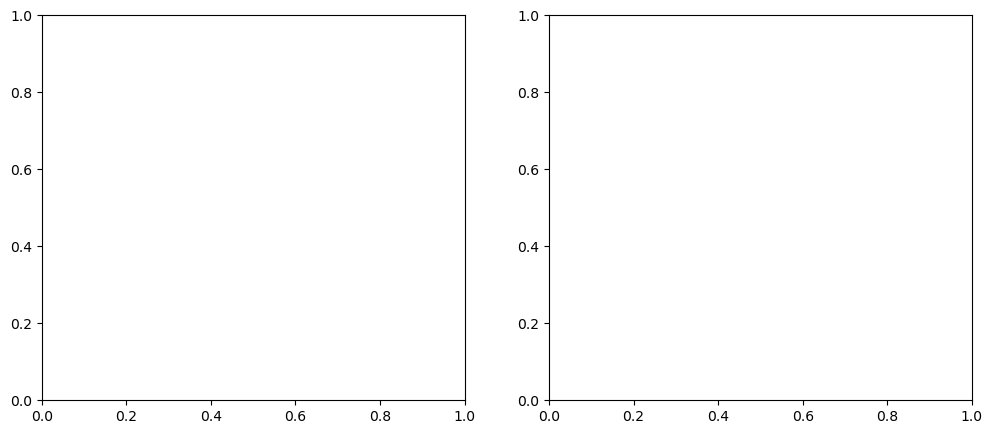

In [69]:
def learning_curve(history, epoch, figsize=(12, 5)):
    epoch_range = range(1, epoch + 1)
    _, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)

    # training vs validation accuracy
    ax[0].plot(epoch_range, history.history['accuracy'])
    ax[0].plot(epoch_range, history.history['val_accuracy'])
    ax[0].set_title('Fruits Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='upper left')

    # training vs validation loss
    ax[1].plot(epoch_range, history.history['loss'])
    ax[1].plot(epoch_range, history.history['val_loss'])
    ax[1].set_title('Fruits Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')

    plt.show()
    

learning_curve(history, 50)

In [ ]:
def manual_eval(model, x_test, y_test):
    predictions = model.predict(x=x_test)
    n_preds = len(predictions)
    correct = 0
    wrong = 0
    for i in np.arange(n_preds):
        predict_max = np.argmax(predictions[i])
        actual_max = np.argmax(y_test[i])

        if predict_max == actual_max:
            correct += 1
        else:
            wrong += 1

    print('correct: {0}, wrong: {1}'.format(correct, wrong))
    print('accuracy =', correct / n_preds)

manual_eval(model, test_images, test_onehot_labels)